# Analizar la relación entre el nivel educativo parental y la preparación previa para exámenes en estudiantes de 5to y 6to grado.

In [ ]:
#leer la base de datos en formato csv y mostrar las primeras 8 observaciones
import pandas as pd
csv = ('C:\\Users\\User\\Desktop\\RICARDOUNI\\'
        'StudentsPerformance G5-G6 - StudentsPerformance G5-G6.csv')
df = pd.read_csv(csv)
df.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


In [81]:
#filtrar a los estudiantes que solo hayan completado la preparacion
filtro_curso = df[df['test preparation course'] == 'completed']

#separar en grupos a los estudiantes hayan completado la preparacion
# por el nivel educativo de los padres 
filtro_curso1 = filtro_curso.groupby('parental level of education').size()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "associate's degree"),
  Text(1, 0, "bachelor's degree"),
  Text(2, 0, 'high school'),
  Text(3, 0, "master's degree"),
  Text(4, 0, 'some college'),
  Text(5, 0, 'some high school')])

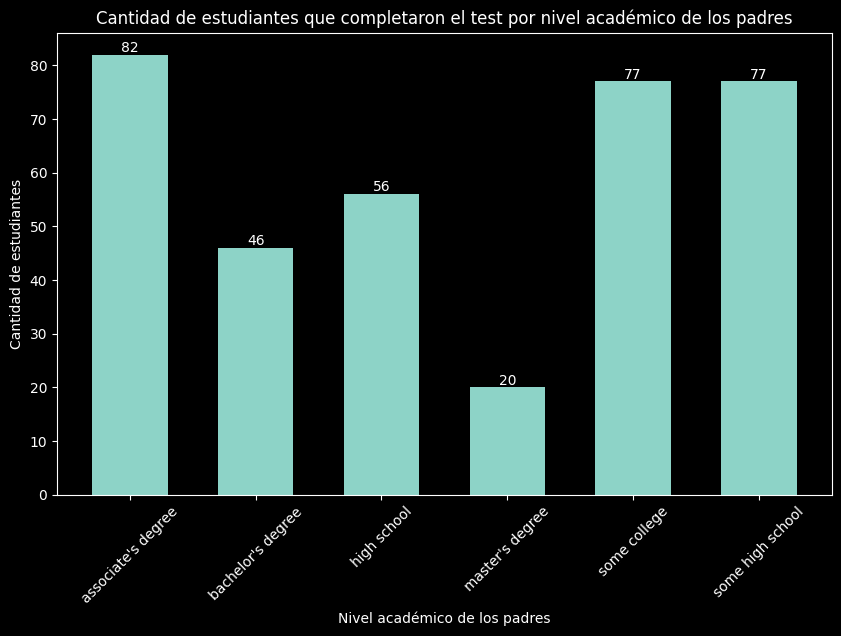

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
etiquetas = filtro_curso1.index
valores = filtro_curso1.values

grafico = plt.bar(etiquetas, valores, width=0.6)
plt.bar_label(grafico, labels=valores)

plt.title('Cantidad de estudiantes que completaron el '
           'test por nivel académico de los padres')

plt.xlabel('Nivel académico de los padres')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)